In [1]:
from random import random, randint
import math

In [36]:
def wineprice(rating, age):
    peak_age = rating - 50
    
    price = rating / 2
    if age > peak_age:
        price =  price * ( 5 - (age - peak_age))
    else:
        price = price * (5 * ((age + 1) / peak_age))
    
    if price < 0: price = 0
    return price

In [16]:
def wineset1():
    rows = []
    for i in range(300):
        rating = random() * 50 + 50
        age = random() * 50
        
        price = wineprice(rating, age)
        
        price *= (random() * 0.4 + 0.8)
        
        rows.append({'input':(rating, age),
                    'result': price})
    return rows

In [37]:
wineprice(95.0, 3.0)

21.111111111111114

In [38]:
data = wineset1()
data[0]

{'input': (95.62737420496055, 26.859589635037747),
 'result': 155.21749822234756}

## kNN

In [21]:
# defining similarity
def euclidean(v1, v2):
    d = 0.0
    for i in range(len(v1)):
        d += (v1[i] - v2[i])**2
    return math.sqrt(d)

In [39]:
data[0]['input']

(95.62737420496055, 26.859589635037747)

In [40]:
data[1]['input']

(67.08852560206698, 43.24635166063429)

In [41]:
euclidean(data[0]['input'], data[1]['input'])

32.90884150592988

In [23]:
def getdistance(data, vec1):
    distancelist = []
    for i in range(len(data)):
        vec2 = data[i]['input']
        distancelist.append((euclidean(vec1, vec2), i))
        
    distancelist.sort()
    return distancelist    

In [26]:
def knnestimate(data, vec1, k=5):
    d_list = getdistance(data, vec1)
    avg = 0.0
    
    for i in range(k):
        idx = d_list[i][1]
        avg += data[idx]['result']
    avg = avg / k
    
    return avg

In [53]:
knnestimate(data, (99.0, 5.0))

33.907895485000836

In [43]:
knnestimate(data, (99.0, 5.0), k=3)

22.579821180562394

In [48]:
wineprice(99.0, 5.0)

30.306122448979593

In [51]:
knnestimate(data, (99.0, 5.0), k=8)

38.2038843007089

In [52]:
knnestimate(data, (99.0, 5.0), k=1)

31.49431995509917

In [ ]:
## looks like k = 3 can get more precise result

In [ ]:
## weight

In [54]:
# solutin 1: inverse function
def inverseweight(dist, num=1.0, const=0.1):
    return num / (dist + const)

In [55]:
# solutin 2: subtraction function
def substractweight(dist, const=1.0):
    if dist > const: 
        return 0
    else:
        return const - dist

In [56]:
# solutin 3: Gaussian function
def gaussian(dist, sigma=10.0):
    return math.e**(-dist**2 / (2 * sigma**2))

In [57]:
substractweight(0.1)

0.9

In [58]:
inverseweight(0.1)

5.0

In [59]:
gaussian(0.1)

0.9999500012499791

In [60]:
gaussian(1.0)

0.9950124791926823

In [61]:
inverseweight(1)

0.9090909090909091

In [62]:
substractweight(1)

0.0

In [63]:
def weightedknn(data, vec1, k=5, weightf=gaussian):
    d_list = getdistance(data, vec1)
    avg = 0.0
    totalweight = 0.0
    
    # weight mean
    for i in range(k):
        dist = d_list[i][0]
        idx = d_list[i][1]
        weight = weightf(dist)
        avg += weight * data[idx]['result']
        totalweight += weight
        
    avg = avg / totalweight
    return avg

In [64]:
weightedknn(data, (99.0, 5.0))

33.71679909916762

In [65]:
knnestimate(data, (99.0, 5.0))

33.907895485000836

In [ ]:
## cross-Validation

In [66]:
def dividedata(data, test=0.05):
    trainset = []
    testset = []
    for row in data:
        if random() < test:
            testset.append(row)
        else:
            trainset.append(row)
    return trainset, testset

In [67]:
def testalgorithm(algf, trainset, testset):
    error = 0.0
    for row in testset:
        guess = algf(trainset, row['input'])
        error += (row['result'] - guess)**2
    return error / len(testset)

In [68]:
def crossvalidation(algf, data, trials=100, test=0.05):
    error =  0.0
    for i in range(trials):
        trainset, testset = dividedata(data, test)
        error += testalgorithm(algf, trainset, testset)
    return error / trials

In [69]:
crossvalidation(knnestimate, data)

806.0874155208642

In [70]:
def knn3(d, v):
    return knnestimate(d, v, k=3)

In [71]:
crossvalidation(knn3, data)

549.6352403988212

In [72]:
def knn1(d, v):
    return knnestimate(d, v, k=1)

In [73]:
crossvalidation(knn1, data)

625.0295582372154

In [74]:
crossvalidation(knn1, data, 200)

618.7956153408006

In [75]:
crossvalidation(weightedknn, data)

680.6435420163574

In [79]:
def knninverse(d, v):
    return weightedknn(d, v, weightf=inverseweight)

In [81]:
crossvalidation(knninverse, data)

494.5944457656564

In [82]:
def knnsub(d, v):
    return weightedknn(d, v, weightf=substractweight)

In [83]:
crossvalidation(knnestimate, data)

653.1664990127227

In [ ]:
## adding more vairance

In [87]:
def wineset2():
    rows = []
    for i in range(300):
        rating = random() * 50 + 50
        age = random() * 50
        aisle = float(randint(1, 20))
        bottlesize = [375.0, 750.0, 1500.0, 3000.0][randint(0, 3)]
        price = wineprice(rating, age)
        price *= (bottlesize / 750)
        price *= (random() * 0.9 + 0.2)
        rows.append({'input':(rating, age, aisle, bottlesize),
                    'result': price})
    return rows

In [85]:
crossvalidation(knn3, data)  # original data

504.4689240967431

In [88]:
data1 = wineset2()
crossvalidation(knn3, data1)

5802.048852018131

In [ ]:
## upper two rows show data obvious difference, 

## this requires scaling dimensions

In [89]:
def rescale(data, scale):
    scaledata = []
    for row in data:
        scaled = [scale[i] * row['input'][i] for i in range(len(scale))]
        scaledata.append({'input': scaled, 'result': row['result']})
    return scaledata

In [91]:
sdata = rescale(data1, [10, 10, 0, 0.5]) # low importance feature change to 0
crossvalidation(knn3, sdata)

3761.8059113609506

In [97]:
sdata = rescale(data1, [10, 10, 0.1, 0.5])
crossvalidation(knn3, sdata)

4214.900814051316

In [94]:
crossvalidation(weightedknn, sdata)

4309.0148176606735

In [98]:
def createcostfunction(algf, data):
    def costf(scale):
        sdata = rescale(data, scale)
        return crossvalidation(algf, sdata, trials=100)
    return costf

In [99]:
weightdomain = [(0, 20)] * 4

In [114]:
# chapter 5 function
from random import randint, random

def annealingoptimize(domain, costf, T=10000.0, cool=0.95, step=1):
    # Initialize the values randomly
    vec=[float(randint(domain[i][0], domain[i][1])) 
         for i in range(len(domain))]
  
    while T > 0.1:
        # Choose one of the indices
        i = randint(0, len(domain) - 1)

        # Choose a direction to change it
        dir = randint(-step, step)

        # Create a new list with one of the values changed
        vecb=vec[:]
        vecb[i] += dir
        if vecb[i] < domain[i][0]: vecb[i] = domain[i][0]
        elif vecb[i] > domain[i][1]: vecb[i] = domain[i][1]

        # Calculate the current cost and the new cost
        ea = costf(vec)
        eb = costf(vecb)
        p = pow(math.e,(-eb-ea)/T)

        print(vec, ea)


        # Is it better, or does it make the probability
        # cutoff?
        if (eb < ea or random() < p):
            vec = vecb      

        # Decrease the temperature
        T = T * cool
        
    return vec

In [115]:
costf = createcostfunction(knnestimate, data1)
annealingoptimize(weightdomain, costf, step=2)

[3.0, 14.0, 17.0, 19.0] 7839.166429084635
[3.0, 14.0, 17.0, 20] 7506.516784913639
[3.0, 14.0, 17.0, 20] 6564.009283676085
[3.0, 14.0, 17.0, 20] 7952.9973850324195
[4.0, 14.0, 17.0, 20] 7616.89680859468
[4.0, 13.0, 17.0, 20] 6434.7747143332135
[4.0, 13.0, 17.0, 20] 6903.908784726788
[4.0, 13.0, 17.0, 20] 7281.294180944555
[4.0, 13.0, 17.0, 19] 7992.421442771031
[4.0, 13.0, 17.0, 17] 6897.691968132815
[4.0, 13.0, 17.0, 17] 6830.4273842199145
[4.0, 15.0, 17.0, 17] 7053.701523971539
[4.0, 15.0, 17.0, 17] 6865.169620309864
[5.0, 15.0, 17.0, 17] 5061.309822152715
[5.0, 15.0, 17.0, 17] 6492.573646221527
[5.0, 15.0, 17.0, 17] 4976.8703720057665
[5.0, 15.0, 17.0, 17] 5539.661899832536
[5.0, 15.0, 17.0, 17] 6268.404872853651
[5.0, 14.0, 17.0, 17] 5253.7483113277
[5.0, 14.0, 17.0, 17] 6371.140651057122
[5.0, 14.0, 16.0, 17] 6073.707867349158
[5.0, 14.0, 16.0, 18] 5328.492927100805
[5.0, 14.0, 16.0, 18] 5358.713709285417
[5.0, 14.0, 16.0, 18] 5953.055642869817
[5.0, 14.0, 16.0, 18] 6786.0907922334

KeyboardInterrupt: 

In [ ]:
## use geneticoptimize 

In [117]:
## new data set 

def wineset3():
    rows = wineset1()
    for row in rows:
        if random() < 0.5:
            row['result'] *= 0.5 # sometime have 50% discount
    return rows

In [118]:
data3 = wineset3()
wineprice(99.0, 20.0)

106.07142857142857

In [119]:
weightedknn(data3, [99.0, 20.0])

68.79264339979004

In [ ]:
## estimating the probability density

In [120]:
def probguess(data, vec1, low, high, k=5, weightf=gaussian):
    d_list = getdistance(data, vec1)
    nweight = 0.0
    tweight = 0.0
    
    for i in range(k):
        dist = d_list[i][0]
        idx = d_list[i][1]
        weight = weightf(dist)
        v = data[idx]['result']
        
        if v >= low and v < high:
            nweight += weight
        tweight += weight
    if tweight == 0: return 0
    
    return nweight / tweight

In [121]:
probguess(data3, [99, 20], 40, 80)

0.5991369287537476

In [122]:
probguess(data3, [99, 20], 80, 120)

0.40086307124625237

In [123]:
probguess(data3, [99, 20], 120, 1000)

0.0

In [124]:
probguess(data3, [99, 20], 30, 120)

1.0

In [125]:
# Graphing the probabilites
from matplotlib.pylab import *
%matplotlib inline

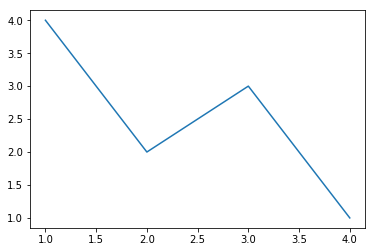

In [126]:
a = array([1, 2, 3, 4])
b = array([4, 2, 3, 1])
plot(a, b)

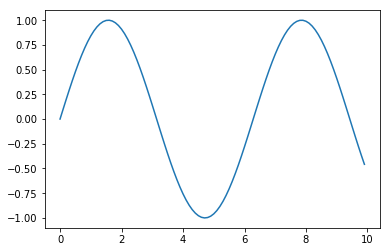

In [127]:
t1 = arange(0.0, 10.0, 0.1)
plot(t1, sin(t1))

In [130]:
def cumulativegraph(data, vec1, high, k=5, weightf=gaussian):
    t1 = arange(0.0, high, 0.1)
    cprob = array([probguess(data, vec1, 0, v, k, weightf) for v in t1])
    plot(t1, cprob)

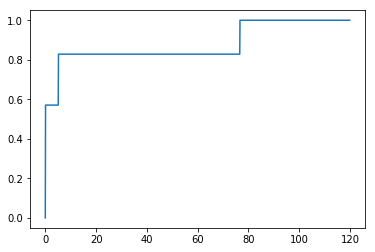

In [131]:
cumulativegraph(data3, (1, 1), 120)

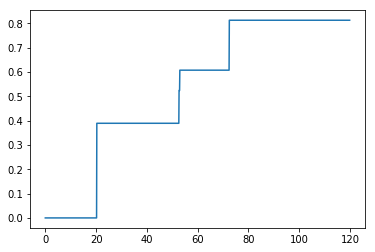

In [133]:
data4 = wineset3()
cumulativegraph(data4, (1, 1), 120)

In [135]:
# upper out is unstable?


In [136]:
## different point probility
## every point = neigbor probility * weight


def probilitygraph(data, vec1, high, k=5, weightf=gaussian, ss=5.0):
    t1 = arange(0.0, high, 0.1)
    
    probs = [probguess(data, vec1, v, v+0.1, k, weightf) for v in t1]
    
    smoothed = []
    for i in range(len(probs)):
        sv = 0.0
        for j in range(0, len(probs)):
            dist = abs(i - j) * 0.1
            weight = gaussian(dist, sigma=ss)
            sv += weight * probs[j]
        smoothed.append(sv)
    smoothed = array(smoothed)

    plot(t1, smoothed)

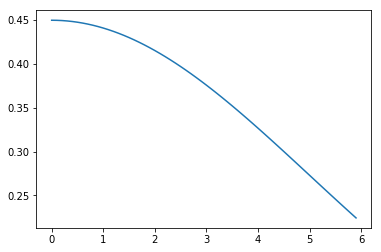

In [139]:
data3 = wineset3()
probilitygraph(data3, (1,1), 6)

In [ ]:
# this line looks like some error.

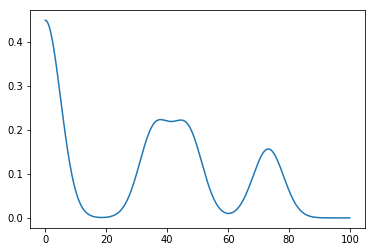

In [141]:
probilitygraph(data3, (1,1), 100)

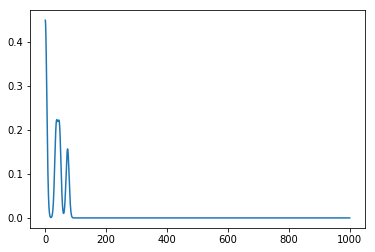

In [142]:
probilitygraph(data3, (1,1), 1000)